# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [4]:
df=pd.read_csv('/content/RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [5]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [18]:
df['Sex_of_casualty'].value_counts()

,count
Sex_of_casualty,
Male,5253
na,4443
Female,2620


In [20]:
#while there are some na gender for sex casualtiy i will assign then then as Unknown
df['Sex_of_casualty']=df['Sex_of_casualty'].str.replace('na','Unknown')
df['Sex_of_casualty'].value_counts()

,count
Sex_of_casualty,
Male,5253
Unknown,4443
Female,2620


In [21]:

df['Casualty_class'].value_counts()

,count
Casualty_class,
Driver or rider,4944
na,4443
Pedestrian,1649
Passenger,1280


In [22]:
#na will be replaced with majority
df['Casualty_class']=df['Casualty_class'].str.replace('na', df['Casualty_class'].mode()[0])
df['Casualty_class'].value_counts()

,count
Casualty_class,
Driver or rider,9387
Pedestrian,1649
Passenger,1280


In [23]:
df['Age_band_of_casualty'].value_counts()

,count
Age_band_of_casualty,
na,4443
18-30,3145
31-50,2455
Under 18,1035
Over 51,994
5,244


In [26]:
df1=df.copy()
df['Age_band_of_casualty']=df['Age_band_of_casualty'].str.replace('na','18-30')
df['Age_band_of_casualty'].value_counts()

,count
Age_band_of_casualty,
18-30,7588
31-50,2455
Under 18,1035
Over 51,994
5,244


In [17]:
df['Casualty_severity'].value_counts()

,count
Casualty_severity,
3,7076
na,4443
2,771
1,26


In [27]:
df['Casualty_severity']=df['Casualty_severity'].str.replace('na',df['Casualty_severity'].mode()[0])
df['Casualty_severity'].value_counts()

,count
Casualty_severity,
3,11519
2,771
1,26


In [28]:
df['Lanes_or_Medians'].value_counts()

,count
Lanes_or_Medians,
Two-way (divided with broken lines road marking),4411
Undivided Two way,3796
other,1660
Double carriageway (median),1020
One way,845
Two-way (divided with solid lines road marking),142
Unknown,57


In [29]:
df['Road_allignment'].value_counts()

,count
Road_allignment,
Tangent road with flat terrain,10459
Tangent road with mild grade and flat terrain,501
Steep grade downward with mountainous terrain,429
Tangent road with mountainous terrain and,396
Gentle horizontal curve,163
Escarpments,113
Sharp reverse curve,57
Tangent road with rolling terrain,37
Steep grade upward with mountainous terrain,19


In [30]:
df['Types_of_Junction'].value_counts()

,count
Types_of_Junction,
Y Shape,4543
No junction,3837
Crossing,2177
Other,445
Unknown,191
O Shape,164
T Shape,60
X Shape,12


In [31]:
df['Road_surface_type'].value_counts()

,count
Road_surface_type,
Asphalt roads,11296
Earth roads,358
Gravel roads,242
Other,167
Asphalt roads with some distress,81


In [32]:
df['Type_of_collision'].value_counts()

,count
Type_of_collision,
Vehicle with vehicle collision,8774
Collision with roadside objects,1786
Collision with pedestrians,896
Rollover,397
Collision with animals,171
Collision with roadside-parked vehicles,54
Fall from vehicles,34
Other,26
Unknown,14


In [33]:
df['Vehicle_movement'].value_counts()

,count
Vehicle_movement,
Going straight,8158
Moving Backward,985
Other,937
Reversing,563
Turnover,489
Getting off,339
Entering a junction,193
Overtaking,96
Unknown,88


In [34]:
df['Work_of_casuality'].value_counts()

,count
Work_of_casuality,
Driver,5903
Self-employed,2044
Employee,553
Other,463
Student,103
Unemployed,33
Unknown,19


In [35]:
df['Fitness_of_casuality'].value_counts()
######################

,count
Fitness_of_casuality,
Normal,9608
NormalNormal,19
Deaf,18
Other,18
Blind,18


In [36]:

df['Area_accident_occured'].value_counts()

,count
Area_accident_occured,
Other,3819
Office areas,3451
Residential areas,2060
Church areas,1060
Industrial areas,456
School areas,415
Recreational areas,327
Outside rural areas,218
Hospital areas,121


In [15]:
df['Defect_of_vehicle'].value_counts()

,count
Defect_of_vehicle,
No defect,7777
7,76
5,36


In [14]:

df['Service_year_of_vehicle'].value_counts()


,count
Service_year_of_vehicle,
Unknown,2883
2-5yrs,1792
Above 10yr,1324
5-10yrs,1280
1-2yr,827
Below 1yr,282


In [13]:

df['Owner_of_vehicle'].value_counts()

,count
Owner_of_vehicle,
Owner,10459
Governmental,1041
Organization,312
Other,22


In [12]:

df['Type_of_vehicle'].value_counts()

,count
Type_of_vehicle,
Automobile,3205
Lorry (41?100Q),2186
Other,1208
Pick up upto 10Q,811
Public (12 seats),711
Stationwagen,687
Lorry (11?40Q),541
Public (13?45 seats),532
Public (> 45 seats),404


In [11]:
df['Driving_experience'].value_counts()

,count
Driving_experience,
5-10yr,3363
2-5yr,2613
Above 10yr,2262
1-2yr,1756
Below 1yr,1342
No Licence,118
unknown,33


In [10]:
df['Vehicle_driver_relation'].value_counts()

,count
Vehicle_driver_relation,
Employee,9627
Owner,1973
Other,123
Unknown,14


In [9]:
df['Educational_level'].value_counts()

,count
Educational_level,
Junior high school,7619
Elementary school,2163
High school,1110
Above high school,362
Writing & reading,176
Unknown,100
Illiterate,45


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [37]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


Educational_level	741
Vehicle_driver_relation	579
Driving_experience	829
Type_of_vehicle	950
Owner_of_vehicle	482
Service_year_of_vehicle	3928
Defect_of_vehicle	4427
Area_accident_occured	239
Lanes_or_Medians	385
Road_allignment	142
Types_of_Junction	887
Road_surface_type

In [41]:
df['Educational_level']=df['Educational_level'].fillna(df['Educational_level'].mode()[0])

In [44]:
df['Vehicle_driver_relation']=df['Vehicle_driver_relation'].fillna(df['Vehicle_driver_relation'].mode()[0])

In [43]:
df['Driving_experience']=df['Driving_experience'].fillna(df['Driving_experience'].mode()[0])

In [45]:
df['Type_of_vehicle']=df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0])

In [46]:
df['Owner_of_vehicle']=df['Owner_of_vehicle'].fillna(df['Owner_of_vehicle'].mode()[0])

In [40]:
df['Service_year_of_vehicle']=df['Service_year_of_vehicle'].fillna(df['Service_year_of_vehicle'].mode()[0])

In [47]:
df['Defect_of_vehicle']=df['Defect_of_vehicle'].fillna(df['Defect_of_vehicle'].mode()[0])

In [48]:
df['Area_accident_occured']=df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode()[0])

In [49]:
df['Lanes_or_Medians']=df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode()[0])

In [50]:
df['Road_allignment']=df['Road_allignment'].fillna(df['Road_allignment'].mode()[0])

In [51]:
df['Types_of_Junction']=df['Types_of_Junction'].fillna(df['Types_of_Junction'].mode()[0])

In [52]:
df['Road_surface_type']=df['Road_surface_type'].fillna(df['Road_surface_type'].mode()[0])

In [38]:
df['Work_of_casuality']=df['Work_of_casuality'].fillna(df['Work_of_casuality'].mode()[0])

In [53]:
df['Fitness_of_casuality']=df['Fitness_of_casuality'].fillna(df['Fitness_of_casuality'].mode()[0])


In [55]:
df['Type_of_collision']=df['Type_of_collision'].fillna(df['Type_of_collision'].mode()[0])

In [57]:
df['Vehicle_movement']=df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode()[0])

In [58]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


**finished fill null values **

In [80]:
df.sample()


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
6277,11:00:00,Sunday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,Driver or rider,Unknown,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
4984,11:26:00,Monday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
4115,17:40:00,Thursday,Under 18,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Other,Driver or rider,Unknown,18-30,3,Self-employed,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
7668,17:34:00,Friday,18-30,Male,Junior high school,Employee,Below 1yr,Long lorry,Owner,Unknown,...,Moving Backward,Pedestrian,Male,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
3235,10:15:00,Friday,Unknown,Female,Junior high school,Employee,2-5yr,Public (12 seats),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4348,7:30:00,Thursday,18-30,Male,Elementary school,Employee,5-10yr,Automobile,Owner,2-5yrs,...,Turnover,Pedestrian,Female,18-30,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury
2648,10:25:00,Wednesday,31-50,Male,Junior high school,Employee,Above 10yr,Public (13?45 seats),Owner,Unknown,...,Going straight,Driver or rider,Unknown,18-30,3,Self-employed,Normal,Not a Pedestrian,Turnover,Slight Injury
1255,15:40:00,Friday,31-50,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Above 10yr,...,Reversing,Driver or rider,Unknown,18-30,3,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
214,7:00:00,Thursday,31-50,Male,Junior high school,Employee,Above 10yr,Lorry (11?40Q),Owner,1-2yr,...,Moving Backward,Passenger,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
1607,17:30:00,Tuesday,18-30,Male,Junior high school,Owner,Below 1yr,Pick up upto 10Q,Owner,Unknown,...,Turnover,Passenger,Female,31-50,3,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Service_year_of_vehicle      12316 non-null  object
 10  Defect_of_vehicle            12316 non-null  object
 11  Area_accident_occured        12316 non-null  object
 12  Lanes_or_Medians             12316 non-null  object
 13  Road_allignment              12

In [85]:
dfSca=df.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfSca[['Number_of_casualties']] = scaler.fit_transform(dfSca[['Number_of_casualties']])
dfSca[['Number_of_vehicles_involved']] = scaler.fit_transform(dfSca[['Number_of_vehicles_involved']])
dfSca

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,Driver or rider,Unknown,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,Driver or rider,Unknown,18-30,3,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,Going straight,Driver or rider,Unknown,18-30,3,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Unknown,...,Going straight,Driver or rider,Unknown,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Unknown,...,Other,Driver or rider,Unknown,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,Driver or rider,Unknown,18-30,3,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [90]:
from sklearn.preprocessing import OneHotEncoder
dfoheAd=dfSca.copy()
ohe = OneHotEncoder(handle_unknown='ignore')
ohe_df = pd.DataFrame(ohe.fit_transform(df[['Age_band_of_driver']]).toarray())
ohe_df.columns = ohe.get_feature_names_out(['Age_band_of_driver'])

dfoheAd = dfoheAd.join(ohe_df)
dfoheAd = dfoheAd.drop('Age_band_of_driver', axis=1)
dfoheAd.head(20)

,Time,Day_of_week,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Age_band_of_driver_18-30,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown
0,17:02:00,Monday,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury,1.0,0.0,0.0,0.0,0.0
1,17:02:00,Monday,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury,0.0,1.0,0.0,0.0,0.0
2,17:02:00,Monday,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,No defect,...,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury,1.0,0.0,0.0,0.0,0.0
3,1:06:00,Sunday,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,No defect,...,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1.0,0.0,0.0,0.0,0.0
4,1:06:00,Sunday,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,No defect,...,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury,1.0,0.0,0.0,0.0,0.0
5,14:15:00,Friday,Male,Junior high school,Unknown,5-10yr,Automobile,Owner,Unknown,No defect,...,Driver,Normal,Not a Pedestrian,Overloading,Slight Injury,0.0,1.0,0.0,0.0,0.0
6,17:30:00,Wednesday,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Unknown,No defect,...,Driver,Normal,Not a Pedestrian,Other,Slight Injury,1.0,0.0,0.0,0.0,0.0
7,17:20:00,Friday,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,No defect,...,Driver,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury,1.0,0.0,0.0,0.0,0.0
8,17:20:00,Friday,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,No defect,...,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury,1.0,0.0,0.0,0.0,0.0
9,17:20:00,Friday,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,No defect,...,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury,1.0,0.0,0.0,0.0,0.0


In [98]:

ohe = OneHotEncoder(handle_unknown='ignore')
ohe_df = pd.DataFrame(ohe.fit_transform(df[['Sex_of_driver']]).toarray())
ohe_df.columns = ohe.get_feature_names_out(['Sex_of_driver'])

dfoheAd = dfoheAd.join(ohe_df)
dfoheAd = dfoheAd.drop('Sex_of_driver', axis=1)
dfoheAd.head(20)

,Time,Day_of_week,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,...,Cause_of_accident,Accident_severity,Age_band_of_driver_18-30,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Sex_of_driver_Female,Sex_of_driver_Male,Sex_of_driver_Unknown
0,17:02:00,Monday,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,...,Moving Backward,Slight Injury,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,17:02:00,Monday,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,...,Overtaking,Slight Injury,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,17:02:00,Monday,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,No defect,Recreational areas,...,Changing lane to the left,Serious Injury,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1:06:00,Sunday,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,No defect,Office areas,...,Changing lane to the right,Slight Injury,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1:06:00,Sunday,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,No defect,Industrial areas,...,Overtaking,Slight Injury,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,14:15:00,Friday,Junior high school,Unknown,5-10yr,Automobile,Owner,Unknown,No defect,Other,...,Overloading,Slight Injury,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,17:30:00,Wednesday,Junior high school,Employee,2-5yr,Automobile,Owner,Unknown,No defect,Residential areas,...,Other,Slight Injury,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,17:20:00,Friday,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,No defect,Residential areas,...,No priority to vehicle,Slight Injury,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,17:20:00,Friday,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,No defect,Industrial areas,...,Changing lane to the right,Slight Injury,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,17:20:00,Friday,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,No defect,Residential areas,...,Moving Backward,Serious Injury,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [91]:
dfoheAd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Time                         12316 non-null  object 
 1   Day_of_week                  12316 non-null  object 
 2   Sex_of_driver                12316 non-null  object 
 3   Educational_level            12316 non-null  object 
 4   Vehicle_driver_relation      12316 non-null  object 
 5   Driving_experience           12316 non-null  object 
 6   Type_of_vehicle              12316 non-null  object 
 7   Owner_of_vehicle             12316 non-null  object 
 8   Service_year_of_vehicle      12316 non-null  object 
 9   Defect_of_vehicle            12316 non-null  object 
 10  Area_accident_occured        12316 non-null  object 
 11  Lanes_or_Medians             12316 non-null  object 
 12  Road_allignment              12316 non-null  object 
 13  Types_of_Junctio

array([nan])

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

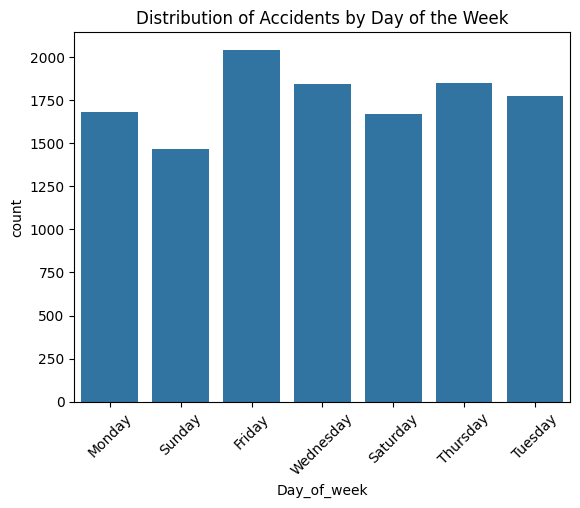

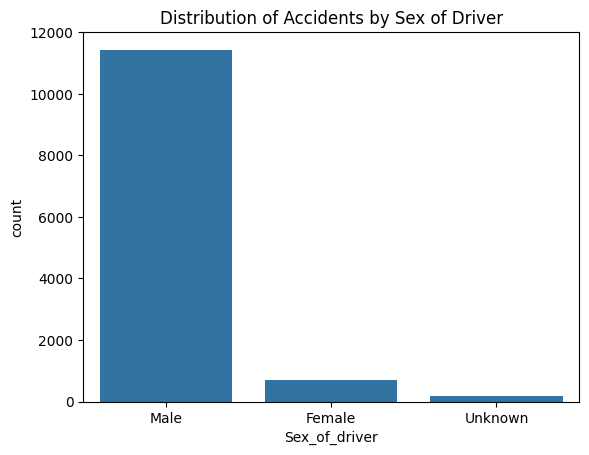

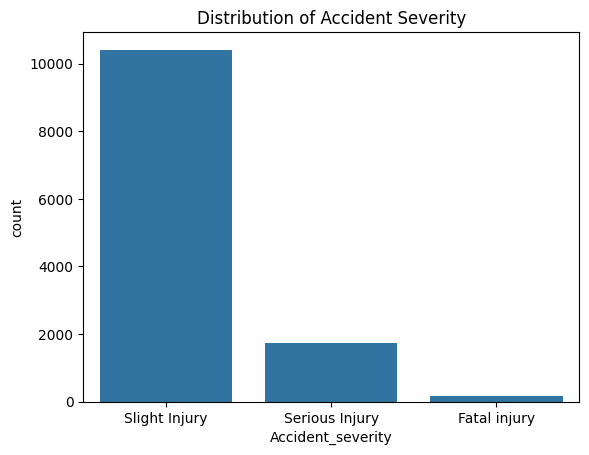

In [97]:

sns.countplot(x='Day_of_week', data=df)
plt.title('Distribution of Accidents by Day of the Week')
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='Sex_of_driver', data=df)
plt.title('Distribution of Accidents by Sex of Driver')
plt.show()

sns.countplot(x='Accident_severity', data=df)
plt.title('Distribution of Accident Severity')
plt.show()


## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [99]:

dfoheAd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Time                         12316 non-null  object 
 1   Day_of_week                  12316 non-null  object 
 2   Educational_level            12316 non-null  object 
 3   Vehicle_driver_relation      12316 non-null  object 
 4   Driving_experience           12316 non-null  object 
 5   Type_of_vehicle              12316 non-null  object 
 6   Owner_of_vehicle             12316 non-null  object 
 7   Service_year_of_vehicle      12316 non-null  object 
 8   Defect_of_vehicle            12316 non-null  object 
 9   Area_accident_occured        12316 non-null  object 
 10  Lanes_or_Medians             12316 non-null  object 
 11  Road_allignment              12316 non-null  object 
 12  Types_of_Junction            12316 non-null  object 
 13  Road_surface_typ

In [101]:

X = dfoheAd[['Number_of_casualties', 'Number_of_vehicles_involved', 'Age_band_of_driver_18-30', 'Age_band_of_driver_31-50','Age_band_of_driver_Over 51', 'Age_band_of_driver_Under 18'
,'Age_band_of_driver_18-30', 'Age_band_of_driver_31-50','Age_band_of_driver_Over 51','Age_band_of_driver_Under 18','Age_band_of_driver_Unknown']]


In [102]:
from sklearn.model_selection import train_test_split

y=df['Accident_severity']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [135]:
from logging import log
from sklearn.linear_model import LogisticRegression

log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_predic_log=log_model.predict(X_test)


#### Decision Tree Classifier

In [136]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)






#### Support Vector Machine (SVM)

In [137]:

from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(X_train,y_train)
y_predic_SVM=svm_model.predict(X_test)



#### K-Neighbors Classifier

In [138]:
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)
y_predic_KNN=knn_model.predict(X_test)



## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [107]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix





0.7999188311688312


**Confusion Metrics**

In [127]:
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_predic_log))

Logistic Regression Confusion Matrix:
[[   0    0   37]
 [   0    0  363]
 [   0    0 2064]]


In [128]:
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Confusion Matrix:
[[   0    1   36]
 [   0   16  347]
 [   0    5 2059]]


In [129]:
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_predic_SVM))

SVM Confusion Matrix:
[[   0    1   36]
 [   0    9  354]
 [   0    6 2058]]


In [130]:
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_predic_KNN))

KNN Confusion Matrix:
[[   1    3   33]
 [   0   50  313]
 [   6  138 1920]]


**Accuracy**


In [140]:
from sklearn.metrics import accuracy_score

accuracy_score=accuracy_score(y_test,y_predic_log)
print("Logistic Acc: ",accuracy_score)


Logistic Acc:  0.8376623376623377


In [147]:

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)


Decision Tree Accuracy: 0.8421266233766234


In [146]:

accuracy_svm = accuracy_score(y_test, y_predic_SVM)
print("SVM Acc: ", accuracy_svm)



SVM Acc:  0.8388798701298701


In [145]:
accuracy_Knn= accuracy_score(y_test, y_predic_KNN)
print("KNN Acc: ", accuracy_Knn)

KNN Acc:  0.7999188311688312


** Precision and Recall & F1**

In [148]:
print("Logistic Regression Classification Report:", classification_report(y_test, y_predic_log))

Logistic Regression Classification Report:                 precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        37
Serious Injury       0.00      0.00      0.00       363
 Slight Injury       0.84      1.00      0.91      2064

      accuracy                           0.84      2464
     macro avg       0.28      0.33      0.30      2464
  weighted avg       0.70      0.84      0.76      2464



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [149]:
print("Decision Tree Classification Report:", classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:                 precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        37
Serious Injury       0.73      0.04      0.08       363
 Slight Injury       0.84      1.00      0.91      2064

      accuracy                           0.84      2464
     macro avg       0.52      0.35      0.33      2464
  weighted avg       0.81      0.84      0.78      2464



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [150]:
print("SVM Classification Report:", classification_report(y_test, y_predic_SVM))

SVM Classification Report:                 precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        37
Serious Injury       0.56      0.02      0.05       363
 Slight Injury       0.84      1.00      0.91      2064

      accuracy                           0.84      2464
     macro avg       0.47      0.34      0.32      2464
  weighted avg       0.79      0.84      0.77      2464



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [151]:
print("KNN Classification Report:", classification_report(y_test, y_predic_KNN))

KNN Classification Report:                 precision    recall  f1-score   support

  Fatal injury       0.14      0.03      0.05        37
Serious Injury       0.26      0.14      0.18       363
 Slight Injury       0.85      0.93      0.89      2064

      accuracy                           0.80      2464
     macro avg       0.42      0.37      0.37      2464
  weighted avg       0.75      0.80      0.77      2464



## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.

**Answer: KNN performed will with predicting eventhough date is biase**







- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.

in KNN

- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: